In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pyreadr
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy import linalg as LA

### Spreads

$\frac{dS^i}{S^i} = \sum_{l} \beta_{i,l} \frac{dI^l}{I^l} + \alpha_i + dZ^i$

In [24]:
df = pd.read_csv('data/sp500_data.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.set_index('date',inplace=True)

In [25]:
# 442 stock returns over 5 years - 1258 days
df.shape

(1259, 442)

In [26]:
# get rid of _price
col_list = []
for i in df.columns:
    col_list.append(i.split('_', 1)[0])
df.columns = col_list

In [27]:
df = df.pct_change()

In [28]:
df = df.dropna(axis=0)

In [29]:
df.index[-1]

'2019-10-04'

In [30]:
import glob

path = '/Users/zachariemartin/Desktop/School/Projects/summer2019/sum19/data/etf data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df_ = pd.read_csv(filename, usecols=[4], header='infer')
    li.append(df_)

etf_df = pd.concat(li, axis=1, ignore_index=True)

In [31]:
etf_df = etf_df.pct_change()
etf_df = etf_df.dropna(axis=0)

In [32]:
# 9 etf returns over 5 years - 1258 days

x = etf_df.values
x.shape

(1258, 9)

In [33]:
# throw out intercept

In [34]:
from sklearn import linear_model

# regress on each stocks returns, save residuals
reg = linear_model.LinearRegression(fit_intercept=False)
x = etf_df.values
df_residuals = pd.DataFrame(columns=df.columns)

for i in range(df.shape[1]):
    y = df.iloc[:,i].values.reshape(-1,1)
    reg.fit(x,y)
    w = reg.coef_
    b = reg.intercept_
    df_residuals.iloc[:,i] = (y-(x@w.T + b)).flatten()

In [35]:
# compare this cell and the one below
df_residuals.head()

,AAPL,ACN,AMG,AMT,ANTM,BBBY,BK,CAH,DE,DLTR,...,MLM,MSFT,NFLX,O,PCAR,SRCL,TGNA,TXT,V,WU
0,0.006154,-0.007869,0.006762,-0.000863,0.003066,0.015486,-0.005636,-0.001046,-0.007980,0.011531,...,-0.002786,0.002844,0.003816,-0.001981,0.001481,0.006961,0.007732,-0.004447,-0.002629,-0.002995
1,0.003695,-0.005921,0.001593,0.003315,-0.004218,0.001876,-0.000052,0.005139,0.001570,-0.002499,...,-0.009441,0.006164,0.001839,0.007510,0.017002,-0.002338,-0.009323,-0.003535,0.000568,0.005938
2,0.014483,-0.002763,-0.000345,0.008392,0.013893,0.019873,-0.010822,0.005232,0.021588,0.009543,...,0.002278,-0.003077,0.015848,0.026125,0.004183,0.012287,-0.016860,-0.005652,-0.003823,-0.012540
3,0.031347,-0.002469,0.000147,0.000180,-0.011363,-0.021116,-0.003570,0.001655,0.016587,-0.014162,...,-0.020429,-0.011139,0.005169,-0.010419,0.000114,-0.003311,-0.015888,0.009501,0.007079,-0.000620
4,-0.002215,0.006749,-0.004672,-0.007954,0.000460,0.001008,-0.003530,0.004324,0.025657,0.009701,...,-0.016232,0.001532,-0.004094,0.008881,0.004517,0.013349,-0.006884,-0.008634,0.009201,0.005154


In [36]:
# compare this cell and the one above
df_residuals = df_residuals.cumsum()
df_residuals.head()

,AAPL,ACN,AMG,AMT,ANTM,BBBY,BK,CAH,DE,DLTR,...,MLM,MSFT,NFLX,O,PCAR,SRCL,TGNA,TXT,V,WU
0,0.006154,-0.007869,0.006762,-0.000863,0.003066,0.015486,-0.005636,-0.001046,-0.007980,0.011531,...,-0.002786,0.002844,0.003816,-0.001981,0.001481,0.006961,0.007732,-0.004447,-0.002629,-0.002995
1,0.009849,-0.013791,0.008355,0.002453,-0.001152,0.017361,-0.005689,0.004093,-0.006410,0.009033,...,-0.012227,0.009008,0.005655,0.005529,0.018483,0.004623,-0.001590,-0.007982,-0.002061,0.002943
2,0.024332,-0.016553,0.008010,0.010845,0.012740,0.037234,-0.016510,0.009325,0.015178,0.018575,...,-0.009949,0.005931,0.021503,0.031654,0.022665,0.016909,-0.018450,-0.013634,-0.005885,-0.009597
3,0.055679,-0.019023,0.008157,0.011025,0.001377,0.016118,-0.020080,0.010980,0.031765,0.004413,...,-0.030378,-0.005208,0.026672,0.021235,0.022780,0.013598,-0.034338,-0.004133,0.001195,-0.010217
4,0.053464,-0.012273,0.003485,0.003070,0.001837,0.017126,-0.023611,0.015304,0.057422,0.014114,...,-0.046610,-0.003675,0.022577,0.030115,0.027297,0.026947,-0.041223,-0.012767,0.010396,-0.005062


In [37]:
df_residuals.set_index(df.index,inplace=True)

In [38]:
df_residuals.to_csv('zprocess_data.csv')

In [39]:
from statsmodels.tsa.stattools import adfuller

df_df = pd.DataFrame(columns=['ADF Statistic','p-value','n lags used'],index=df_residuals.columns)

# test residuals for stationarity and return adf statistic and p-value, columns 0 and 1 respectively
for i in range(df_residuals.shape[1]):
    result = adfuller(df.iloc[:,i])
    df_df.iloc[i,0] = result[0]
    df_df.iloc[i,1] = result[1]
    df_df.iloc[i,2] = result[2]


In [40]:
# check for significance at 5%
np.where(df_df.iloc[:,1] > .05)

(array([], dtype=int64),)

In [41]:
df_df

,ADF Statistic,p-value,n lags used
AAPL,-10.8282,1.73499e-19,8
ACN,-26.5612,0,1
AMG,-34.0833,0,0
AMT,-13.8091,8.29393e-26,8
ANTM,-36.7231,0,0
BBBY,-35.7298,0,0
BK,-34.7934,0,0
CAH,-36.784,0,0
DE,-35.4293,0,0
DLTR,-16.9549,9.40131e-30,3


In [161]:
# plot R results
df_plot = pd.read_csv('data/mgarch_sim_3000_z100.csv')

In [162]:
num_days = df_plot.shape[0]

df_plot.set_index(pd.date_range('2019-10-05', periods=num_days),inplace=True)
df_plot.drop(['Unnamed: 0'],inplace=True,axis=1)

# plt.plot(datelist,df_plot[:,0])

In [165]:
df_plot.to_csv('mgarch_sim_3000_z100_1.csv')

### Covariance Matrices

In [138]:
# this is what the real first cov matrix looks like from R
# cov_mats[1:5,1:5,1]
#               AAPL           ACN           AMG           AMT          ANTM
# AAPL  8.754898e-05 -1.139086e-05 -1.192942e-06 -1.746261e-06  6.700847e-06
# ACN  -1.139086e-05  5.723274e-05  1.643228e-06  8.624553e-06  9.799957e-07
# AMG  -1.192942e-06  1.643228e-06  1.206017e-04  6.715948e-06 -9.447320e-06
# AMT  -1.746261e-06  8.624553e-06  6.715948e-06  8.823275e-05 -3.082557e-06
# ANTM  6.700847e-06  9.799957e-07 -9.447320e-06 -3.082557e-06  1.224090e-04

In [167]:
covMats = np.load("data/mgarch_sim_3000_cov100.npy")

In [168]:
# load
# covMats = pd.read_csv('data/mgarch_sim_3000_cov100.csv')
covMats = np.load("data/mgarch_sim_3000_cov100.npy")
# shape
covMats.shape

(30000000,)

In [169]:
covM = np.reshape(covMats,(3000,100,100))

In [146]:
# ensure we are working with symmetric matrices

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
for i in range(covM.shape[0]):
    if check_symmetric(covM[0,:,:]) == False:
        print(i)


In [170]:
# dimensions
n = 100

# lists
var55 = []
var95 = []
condNum = []

for i in range(covM.shape[0]):
    # sigma[i]
    mat = covM[i,:,:]
    
    # condition number
    c = LA.cond(mat)
    condNum.append(c)
    
    # perform svd decomp
    model = PCA(n_components=n)
    model.fit_transform(mat)
    
    # explained variance vector - cumulative
    v = model.explained_variance_ratio_.cumsum()
    idx55 = np.where(v>=.55)
    idx95 = np.where(v>=.95)
    
    # extract number of eigenvalues needed, 0 indexed 
    x = idx55[0][0] + 1
    y = idx95[0][0] + 1
    
    # append to list
    var55.append(x)
    var95.append(y)

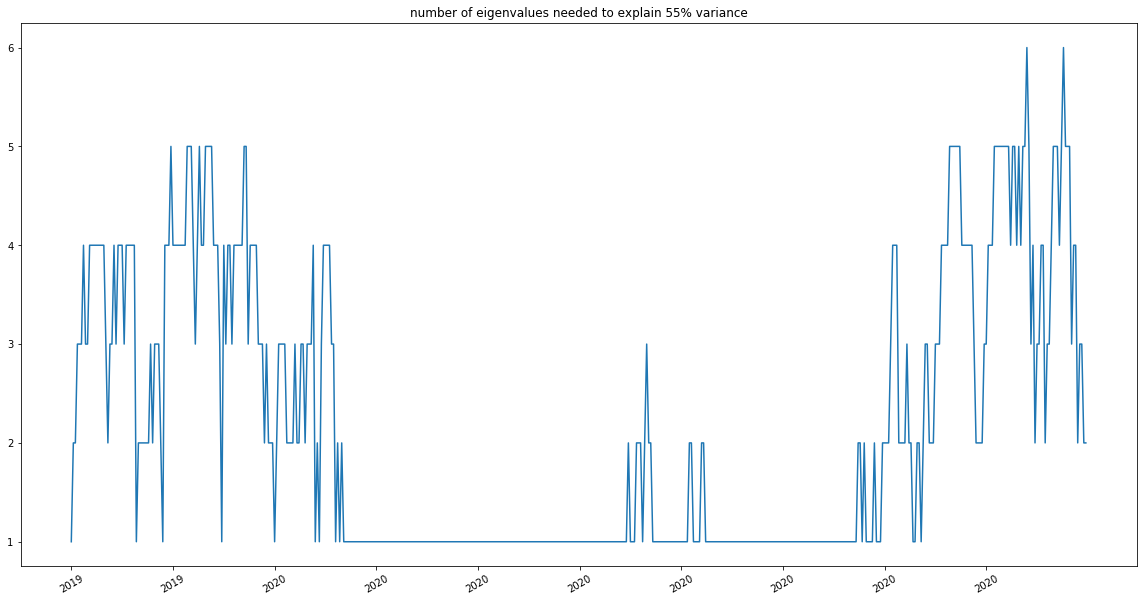

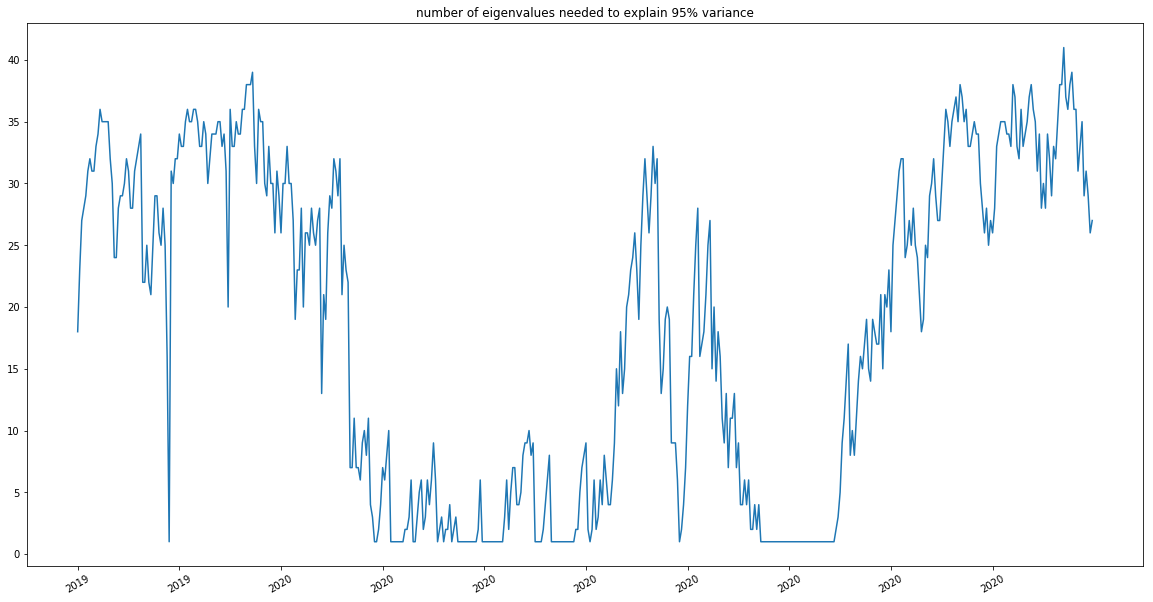

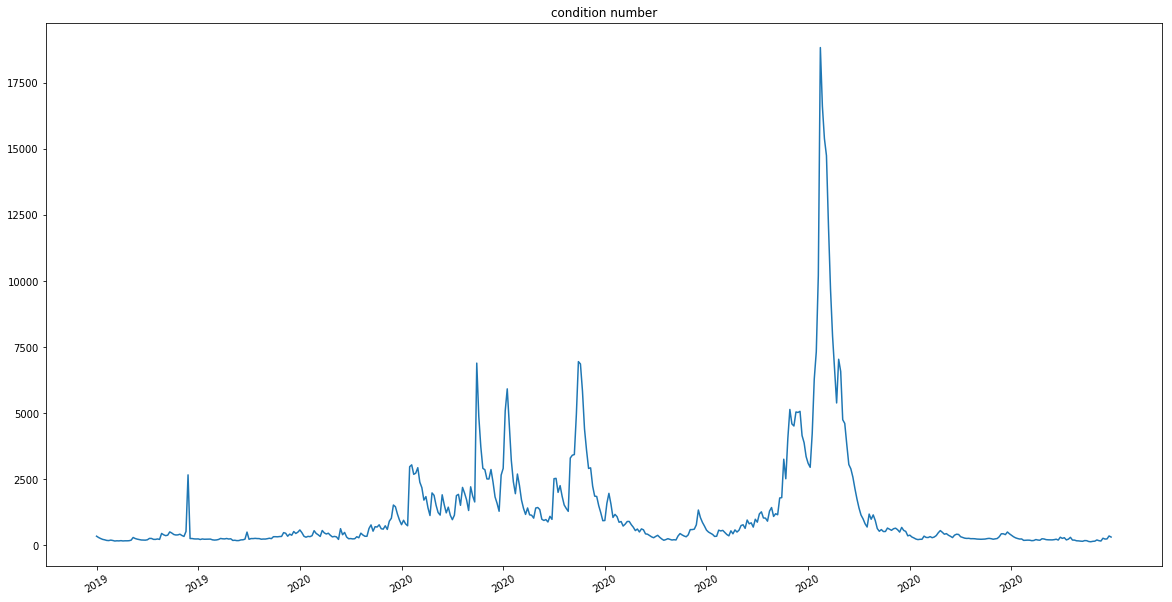

In [171]:
# dates
dates = pd.date_range('2019-10-05', periods=num_days)

arr = np.zeros((covM.shape[0],3))
arr[:,0] = var55
arr[:,1] = var95
arr[:,2] = condNum

df = pd.DataFrame(arr)
df.index = df_plot.index
col_string = 'number of eigenvalues needed to explain '
df.columns = [col_string + '55% variance',col_string + '95% variance','condition number']

# num dates to plot to ease visualization
length = 500

for i in range(df.shape[1]):
        plt.figure(i,figsize=(20,10))
        plt.plot(dates[:length],df.iloc[:length,i])
        plt.xticks(df.iloc[:length,i].index[::50], rotation=30)
        plt.title(df.columns[i])
        plt.savefig('{}.png'.format(df.columns[i]))
        plt.show()


In [154]:
%pwd

'/Users/zachariemartin/Desktop/School/Projects/summer2019/sum19'

In [172]:
# write array to csv
df.to_csv('mgarch_sim_3000_condnum.csv')